In [35]:
def adataTostarmap_spatial(adata, featureN, valuetoplot, result_path):
    cord_xyz = adata.uns['spatial']['V1_Human_Lymph_Node']['scalefactors']['tissue_hires_scalef']*\
                pd.DataFrame(adata.obsm['spatial'],columns=['x', 'y'])
    cord_xyz['z'] = 1
    fcolumns = []
    features = {}
    for i in range(len(featureN)):
        fcolumns.append('PC'+str(featureN[i]))
        features[i] = list(adata.obsm['X_pca'][:,featureN[i]])
    pcs = pd.DataFrame.from_dict(features)
    pcs.columns = fcolumns
    
    if valuetoplot == 'leiden' or 'louvain':
        label = pd.DataFrame(adata.obs[valuetoplot])
        label['cluster'] = label[valuetoplot]
        label = label.reset_index()
    else:
        label = pd.DataFrame(adata.obs_vector(valuetoplot).round(),columns = ['cluster'])

    adataStarmap = pd.concat([cord_xyz,pcs], axis=1, join='inner')
    adataStarmap = pd.concat([adataStarmap,label['cluster']], axis=1, join='inner')
    adataStarmap.to_csv(result_path,index = None)

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.8.1
reading C:\Users\xfanu\Desktop\starmapVR\scanpy\spatial\V1_Human_Lymph_Node_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


filtered out 51 cells that have less than 5000 counts
filtered out 26 cells that have more than 35000 counts
#cells after MT filter: 3962
filtered out 15071 genes that are detected in less than 10 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 10 clusters and added
    'clusters', the cluster l

... storing 'feature_types' as categorical
... storing 'genome' as categorical


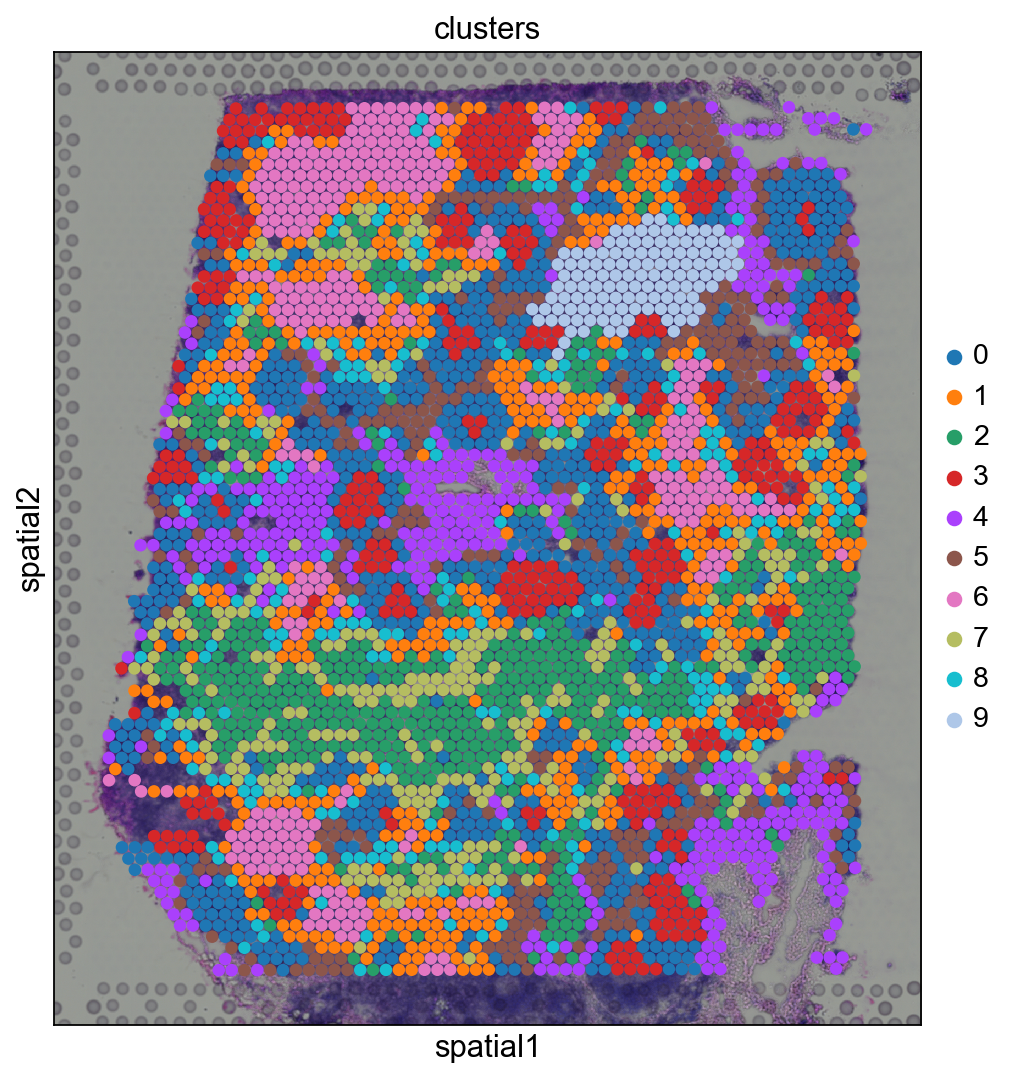

In [2]:
#Analysis of spatial data
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
adata = sc.read_visium("C:/Users/xfanu/Desktop/starmapVR/scanpy/spatial/", count_file='V1_Human_Lymph_Node_filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

In [28]:
adata

AnnData object with n_obs × n_vars = 3962 × 18467
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [36]:
#Transform the result into csv file for starmapVR

featureN = [1,2,3,4,5,6,7,8,9,10,11,12]
valuetoplot = 'clusters'
result_path = 'C:/Users/xfanu/Desktop/starmapVR/spl/V1_Human_Lymph_Node_starmapt.csv'
adataTostarmap_spatial(adata, featureN, valuetoplot, result_path)